Import the data. Get the date used in this example from http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest

In [16]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
import src.data.reader as rd
from pathlib import PurePath
from src.utils.utils import *

pdir = get_relative_project_dir('FinML', partial=False)
# for notebook references
sys.path.extend([pdir])
print(pdir)

data_dir = pdir / 'data'
data_raw_dir = data_dir / 'raw'
data_interim_dir = data_dir / 'interim'
file_name = 'IVE_tickbidask'

Python 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] on darwin
/Users/scottblunsden/Programs/FinML


In [17]:
reader = rd.Reader()
txt_file_name = file_name + '.txt'
infp = PurePath(data_raw_dir / txt_file_name)
df = reader.read_kibot_ticks(infp)


cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask  size     v         dv
dates                                                             
2019-02-22 15:59:55  113.04  113.04  113.05   106   106   11982.24
2019-02-22 15:59:58  113.04  113.04  113.05   199   199   22494.96
2019-02-22 16:00:00  113.05  113.04  113.05  1147  1147  129668.35
2019-02-22 16:10:00  113.05  112.67  113.15     0     0       0.00
2019-02-22 18:30:00  113.05  112.57  113.59     0     0       0.00
--------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1569099 entries, 2009-09-28 09:30:00 to 2019-02-22 18:30:00
Data columns (total 6 columns):
price    1569099 non-null float64
bid      1569099 non-null float64
ask      1569099 non-null float64
size     1569099 non-null int64
v        1569099 non-null int64
dv       1569099 non-null float64
dtypes: float64(4), int64(2)
memory usage: 83.8 MB
None
-------------------------------------------------------------------------------



In [18]:
parq_file_name = file_name+'.parq'
outfp = PurePath(data_raw_dir / parq_file_name)

# Save file to parquet
df.to_parquet(outfp)
# Load from parquet
infp = outfp
df = pd.read_parquet(outfp)


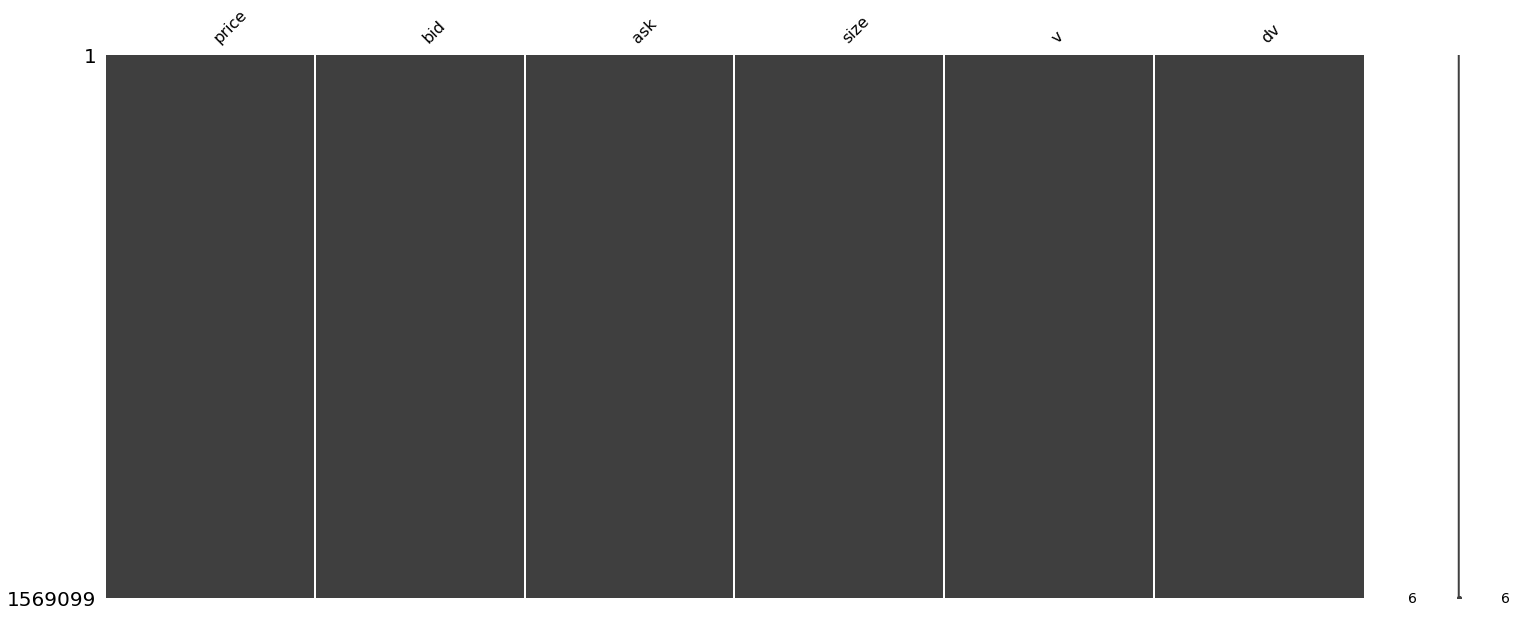

In [19]:
# import visual tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

plt.rcParams['font.weight'] = 'medium'
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

import missingno as msno

msno.matrix(df)


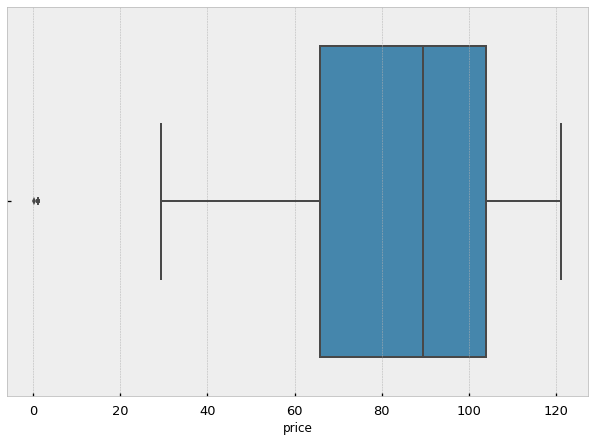

In [20]:
sns.boxplot(df.price)

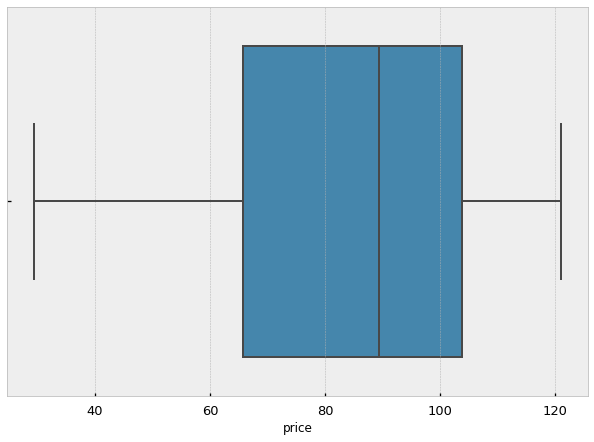

In [21]:
import src.features.datacleaner as dc

data_cleaner = dc.DataCleaner()

df = data_cleaner.remove_outliers(df, 'price')
sns.boxplot(df.price)

In [22]:
parq_cleaned_file_name = file_name+'_clean.parq'
outfp = PurePath(data_interim_dir / parq_cleaned_file_name)

# Save file to parquet
df.to_parquet(outfp)
# Load from parquet
infp = outfp
df = pd.read_parquet(infp)

cprint(df)

/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/Users/scottblunsden/anaconda3/envs/FinML/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask  size     v         dv
dates                                                             
2019-02-22 15:59:55  113.04  113.04  113.05   106   106   11982.24
2019-02-22 15:59:58  113.04  113.04  113.05   199   199   22494.96
2019-02-22 16:00:00  113.05  113.04  113.05  1147  1147  129668.35
2019-02-22 16:10:00  113.05  112.67  113.15     0     0       0.00
2019-02-22 18:30:00  113.05  112.57  113.59     0     0       0.00
--------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1569088 entries, 2009-09-28 09:30:00 to 2019-02-22 18:30:00
Data columns (total 6 columns):
price    1569088 non-null float64
bid      1569088 non-null float64
ask      1569088 non-null float64
size     1569088 non-null int64
v        1569088 non-null int64
dv       1569088 non-null float64
dtypes: float64(4), int64(2)
memory usage: 83.8 MB
None
-------------------------------------------------------------------------------

